# Clase Tutorial 6: Árboles de Decisión 🌳

## 1. Introducción

Los algoritmos de Árboles de Decisión pertenecen al tipo de algoritmos de aprendizaje supervisado, y si bien pueden ser utilizados para regresiones, son principalmente utilizados en problemas de clasificación.  
  
Existen varios tipos de árboles de decisión:

- Árboles de decisión simples:  
    - **Árboles de clasificación:** realizan predicciones sobre una variable **categórica**. 
    - **Árboles de regresión:** realizan predicciones sobre una variable **contínua**.
    
    
- Árboles de decisión basados en técnicas de Ensamble:
    - **Bagging**. 
    - **Random Forest**.  
    - **Boosting**.  

## Árboles de Decisión Simples

A este tipo de árboles simples (splits binarios) se lo suele llamar **CART** (**C**lassification **A**nd **R**egression **T**rees).
  
A continuación veremos un ejemplo simple de la utilización de árboles de decisión para definir a partir del peso y la altura si una persona adulta es de sexo masculino o femenino.

<p align="center">
  <img  src="img/Ejemplo_CART.png">
</p>

Como podemos observar, un árbol de decisión no es más que un conjunto de reglas:
* `If Altura > 180 cm Then Hombre`
* `If Altura <= 180 cm AND Peso > 80 kg Then Hombre`
* `If Altura <= 180 cm AND Peso <= 80 kg Then Mujer`

Por supuesto existen mujeres que miden más de 1,80m o mujeres que pesen más de 80 kg, pero es importante recordar que los modelos predictivos no buscan ser infalibles sino que buscan poder predecir o **clasificar con un determinado grado de precisión** que sea aceptable para el uso que se le quiere dar.

La tarea de los algoritmos de CART es justamente definir a partir de los datos de entrada cuál atributo es conveniente utilizar en cada nodo del árbol, y cuál es el punto de corte óptimo en dicho nodo para realizar las particiones de forma tal de lograr obtener el árbol de clasificación con la mayor precisión posible.


### Ventajas y Desventajas de los Árboles de Decisión

#### 👍 Ventajas
- Son fáciles de interpretar, y pueden ser representados gráficamente.
- Pueden capturar patrones no lineales.
- Pueden manejar datos numéricos y categóricos. Pueden manejar variables categóricas sin necesidad de implementar one hot encoding.
- Requieren menos preparación de los datos. No es necesario normalizar el dataset (entrenamiento no está basado en GD y trabajamos comparando features con umbrales) $\rightarrow$ invariantes a transformaciones monótonas (como escalado o normalización).

#### 👎 Desventajas
- No son robustos ya que son muy sensibles a los cambios en el dataset. Un pequeño cambio del dataset, puede generar un árbol completamente distinto.
- Tienen tendencia a sobreajuste.
- Menor precisión con variables continuas: Los árboles generan divisiones discretas en el espacio de las variables, lo que puede dificultar la captura de relaciones suaves o graduales entre variables continuas y la variable objetivo.
- Suelen verse muy afectados por datasets que no estén balanceados.
- El óptimo global no está garantizado: dado que en cada paso se busca maximizar la ganancia de información, esta metodología no necesariamente puede garantizar el resultado óptimo global.

## 2. Marco Teórico

Un árbol de decisión es una estructura similar a un diagrama de flujo, es por eso que son fáciles de entender e interpretar.

<p align="center">
  <img  src="img/Arboles-de-decision-001.png">
</p>
  
Los árboles están compuestos por las siguientes partes:
- Cada **nodo de decisión** representa una característica.
- Cada **rama** representa una regla de decisión. 
- Cada **nodo hoja** representa el resultado.
- Al nodo superior en un árbol de decisión se lo conoce como el **nodo raíz**.
- Al nodo del cual se desprenden otros nodos se lo llama **nodo padre** y a los nodos que se desprenden del nodo padre se los llama **nodos hijo**.
- Cada rama que no sea un nodo hoja se la puede considerar como un **sub-árbol**.

### 🤔 ¿Cómo funcionan los algoritmos de árboles de decisión?
La idea básica detrás de cualquier algoritmo de árbol de decisión es ir particionando la población inicial en poblaciones más chicas que no se solapen y que sean más homogéneas que la población inicial a fin de que aumenten las posibilidades de predecir la variable objetivo.

Los algoritmos CART realizan ésto, mediante los siguientes pasos: 

1. **Seleccionar la mejor partición**: de todos los features, seleccionar cuál es aquél que divide la población en segmentos más pequeños y homogéneos ("puros") posibles. 
2. **Particionar**: Crear un nodo de decisión con ese atributo y dividir la población generando nuevos nodos hijos. 
3. Repetir el proceso para cada nodo hijo de <span style="color:blue">manera recursiva</span> hasta que ocurra cualquiera de las siguientes condiciones:
    * Todos los nodos hijos sean puros o
    * Se aplique un método de corte preestablecido (por ejemplo indicando la profundidad máxima del árbol)

- Es un algoritmo avaro (**"greedy"**) $\rightarrow$ en cada paso que da busca obtener la mejor partición posible en ese nodo, sin ser estas particiones necesariamente la mejores cuando uno mira el árbol en todo su conjunto.

Veamos cuales son los pasos de CART para seleccionar con qué features comenzar a particionar la población en cada nodo de manera que estas particiones sean lo más puras posible.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from IPython.display import Image

In [22]:
df=pd.read_csv("Data/ejemploCART.csv")
display(df)

,Pelo corto,Peso,Estatura,Sexo
0,False,78,181,M
1,True,82,182,M
2,False,75,162,M
3,False,65,167,M
4,False,85,182,H
5,True,76,170,H
6,True,83,175,H
7,True,75,166,H
8,False,70,166,M
9,True,84,161,M


In [23]:
pd.DataFrame(df.dtypes,columns=['dtypes'])

,dtypes
Pelo corto,bool
Peso,int64
Estatura,int64
Sexo,object


In [3]:
# Trasformamos columnas continuas (Peso y Estatura) a variables categoricas.
df["Peso"]=df["Peso"].apply(lambda x: x>80)
df["Estatura"]=df["Estatura"].apply(lambda x: x>180)
df['Sexo']= df.Sexo.astype('category') # Convertimos a categorical
display(df.head(3))
print()
pd.DataFrame(df.dtypes,columns=['dtypes'])

,Pelo corto,Peso,Estatura,Sexo
0,False,False,True,M
1,True,True,True,M
2,False,False,False,M


,dtypes
Pelo corto,bool
Peso,bool
Estatura,bool
Sexo,category


In [4]:
df.groupby(['Sexo'], observed=True).count()

,Pelo corto,Peso,Estatura
Sexo,,,
H,10,10,10
M,10,10,10


Vemos entonces que antes de hacer ninguna partición tenemos que la población total es de 20 personas, siendo:
* 10 mujeres
* 10 hombres  

Por lo que si tratamos de predecir el sexo de una persona, tenemos un 50% de probabilidad de éxito.

A continuación vamos a ver qué feature logra particionar la población de una manera más homogenea, de manera que mejore nuestras probabilidades de predecir el sexo de la persona. 

**1. Particionamos la población por el atributo de "Peso" > 80 kg**

In [5]:
df_peso = df.groupby(['Peso','Sexo'], observed=True)[['Sexo']].count()
df_peso = df_peso.rename(columns = {'Sexo':'Count'})
df_peso.loc[False,'p']= df_peso.loc[False,'Count'].values / df_peso.loc[False,'Count'].sum()
df_peso.loc[True,'p']= df_peso.loc[True,'Count'].values / df_peso.loc[True,'Count'].sum()
display(df_peso)

Count         p
Peso  Sexo                 
False H         6  0.428571
      M         8  0.571429
True  H         4  0.666667
      M         2  0.333333

**2. Particionamos la población por el atributo de "Estatura" > 180 cm**

In [6]:
df_estatura = df.groupby(['Estatura','Sexo'], observed=True)[['Sexo']].count()
df_estatura = df_estatura.rename(columns = {'Sexo':'Count'})
df_estatura.loc[False,'p']= df_estatura.loc[False,'Count'].values / df_estatura.loc[False,'Count'].sum()
df_estatura.loc[True,'p']= df_estatura.loc[True,'Count'].values / df_estatura.loc[True,'Count'].sum()
display(df_estatura)

Count         p
Estatura Sexo                 
False    H         4  0.333333
         M         8  0.666667
True     H         6  0.750000
         M         2  0.250000

**3. Particionamos la población por el atributo de "Pelo Corto"**

In [7]:
df_pc = df.groupby(['Pelo corto','Sexo'], observed=True)[['Sexo']].count()
df_pc = df_pc.rename(columns = {'Sexo':'Count'})
df_pc.loc[False,'p']= df_pc.loc[False,'Count'].values / df_pc.loc[False,'Count'].sum()
df_pc.loc[True,'p']= df_pc.loc[True,'Count'].values / df_pc.loc[True,'Count'].sum()
display(df_pc)

Count    p
Pelo corto Sexo            
False      H         2  0.2
           M         8  0.8
True       H         8  0.8
           M         2  0.2

Luego de hacer el split utilizando todas las variables independientes, podemos comparar cuál es la que me permite predecir mejor si la persona es hombre o mujer:

<p align="center">
  <img  src="img/Split_Peso.png">
  <img  src="img/Split_estatura.png">
  <img  src="img/Split_PC.png">
</p>

1. **Peso**: los nodos hijos son casi tan heterogéneos como la población total. Es decir esta partición no está aumentando de forma considerable las probabilidades de mejorar la predicción.

2. **Estatura**: logra cierto grado de homogeneidad en los nodos hijos, con lo cual estamos en mejores condiciones de predecir el sexo de una persona luego de haber contestado a la pregunta si la persona mide más de 180 cm comparado a cómo estaba inicialmente antes de contestar dicha pregunta. 

3. **Pelo Corto**: igual al segundo, pero logrando incluso mayor homogeneidad en los nodos hijos. Probabilidad aumenta de 50% por adivinar el sexo a 80% por contestar la pregunta si tiene pelo corto.

Observamos entonces que: 
1. Particionando a la población según los distintos atributos, puede aumentar la precisión en la clasificación. 
2. Dicha precisión va a depender del atributo que selecionemos para realizar la partición, siendo el mejor atributo para particionar aquel que logra que los nodos hijos sean lo más homogéneos (puros) posibles.  


### 🤔 ¿Cómo seleccionar la mejor partición?
Buscamos que las particiones (splits) generen nodos hijos con la menor impureza posible (o dicho de otra forma, la mayor pureza posible). Existen distintos métodos para evaluar la efectividad de las particiones:
- Índice de Gini
- Test Chi-cuadrado
- Entropía / Ganancia de información 
- Reducción de Varianza

La selección de criterios de decisión dependerá de si los árboles son de clasificación o regresión

| |Regresión  | Clasificación  | 
|:--|:--|:--|
|Variable dependiente|**Continua**|**Categórica**|  
|Criterio de Partición| **Reducción de Varianza**|**Inpureza de Gini** (solo particiones binarias)<br>**Chi-Cuadrado** para particiones de orden mayor a 2<br>**Entropía**|
| Valores de los nodos terminales |**Media** de las observaciones en esa región | **Moda** de las observaciones del train set en esa región| 

### **Criterio de partición: Gini**

El índice de Gini es una medida de **impureza** que se utiliza para decidir qué atributo es el más adecuado para dividir los datos en un nodo de un árbol de decisión.

#### 🧐 ¿Qué busca el índice de Gini?

- Minimizar la probabilidad de clasificar incorrectamente una muestra seleccionada aleatoriamente.
- Medir la pureza del nodo, es decir, cuán mezcladas están las clases presentes.
- En cada nodo, el árbol realiza una única división binaria (es decir, genera dos ramas).
> ⚠️ Esto no significa que no se pueda usar en problemas multi-clase. 
>
> El índice de Gini es completamente aplicable a múltiples clases, simplemente se evalúa la impureza considerando todas las clases presentes en el nodo.

#### Índice de Gini en un nodo

La pureza de un nodo $t$ se calcula como:

$$
Gini(t) = \sum_{j=1}^{n} [p(j|t))]^{2} = p_{1}^{2}+p_{2}^{2}+...+p_{n}^{2}
$$ 

donde:
- $p(j|t)$ es la proporción de elementos de la clase $j$ en el nodo $t$.
- $n$ es el número total de clases.

#### Impureza de Gini

La impureza de Gini se define como:

$$
Impureza\,de\,Gini(t) = 1 - Gini(t)
$$

- Esta fórmula permite evaluar cuán mezclado está un nodo: valores cercanos a 0 indican un nodo puro, y valores cercanos a 1 indican mayor impureza.


#### 📐 Cálculo de la impureza después de una partición


Cuando un nodo padre se divide en $k$ nodos hijos, la impureza de la partición se calcula como el promedio ponderado de las impurezas de los nodos hijos:
$$
Impureza\,de\,Gini_{split} = \frac{1}{n}\sum_{i=1}^{k}n_{i}\cdot impureza\,de\,Gini(i)
$$
donde:
- $n_i$ es la cantidad de elementos en el nodo hijo $i$
- $n$ es la suma total de elementos de todos los nodos hijos.

#### ✅ ¿Cómo se elige al mejor feature para dividir?
1. Se calcula la impureza de Gini para cada posible partición según cada feature.
2. Se elige el atributo cuya división produce la impureza de Gini total más baja.
3. El proceso se repite recursivamente para cada nuevo nodo hijo.

🔙 **Volviendo a nuestro ejemplo**

Hagamos los cálculos para determinar la impureza de Gini para cada partición posible.

In [8]:
print("""
----------------
feature 1: PESO
----------------
""")

# definimos una nueva columna que tenga la probabilidad al cuadrado.
df_peso['p2'] = df_peso['p']**2

# siguiendo la formula de Gini, calculamos la impureza de Gini para cada nodo hijo 
imp_gini_false = 1 - df_peso.loc[False,'p2'].sum()
imp_gini_true  = 1 - df_peso.loc[True,'p2'].sum()

# creamos un dataframe con los valores de las impurezas de Gini recién calculadas para cada nodo hijo.
df_gini = pd.DataFrame(index=[False,True], columns=['Impureza Gini'], data=[imp_gini_false,imp_gini_true])
display(df_gini)

# finalmente calculamos el Gini de la partición utilizando el atributo PESO, 
# como el promedio ponderado de las impurezas de Gini de los nodos hijos
Gini_split = 1/20 * ((6+8)*imp_gini_false + (4+2)*imp_gini_true)

print("Gini split: %.2f" % Gini_split)


----------------
feature 1: PESO
----------------



,Impureza Gini
False,0.489796
True,0.444444


Gini split: 0.48


In [9]:
print("""
--------------------
feature 2: ESTATURA
--------------------
""")

# definimos una nueva columna que tenga la probabilidad al cuadrado.
df_estatura['p2'] = df_estatura['p']**2

# siguiendo la formula de Gini, calculamos la impureza de Gini para cada nodo hijo 
imp_gini_false = 1 - df_estatura.loc[False,'p2'].sum()
imp_gini_true  = 1 - df_estatura.loc[True,'p2'].sum()

# creamos un dataframe con los valores de las impurezas de Gini recién calculadas para cada nodo hijo.
df_gini = pd.DataFrame(index = [False,True],columns=['Impureza Gini'], data=[imp_gini_false,imp_gini_true])
display(df_gini)

# finalmente calculamos el Gini de la partición utilizando el atributo ESTATURA, 
# como el promedio ponderado de las impurezas de Gini de los nodos hijos
Gini_split = 1/20 * ((6+8)*imp_gini_false + (4+2)*imp_gini_true)

print("Gini split: %.2f" % Gini_split)


--------------------
feature 2: ESTATURA
--------------------



,Impureza Gini
False,0.444444
True,0.375000


Gini split: 0.42


In [10]:
print("""
----------------------
feature 3: PELO CORTO
----------------------
""")

# definimos una nueva columna que tenga la probabilidad al cuadrado.
df_pc['p2'] = df_pc['p']**2

# siguiendo la formula de Gini, calculamos la impureza de Gini para cada nodo hijo 
imp_gini_false = 1 - df_pc.loc[False,'p2'].sum()
imp_gini_true  = 1 - df_pc.loc[True,'p2'].sum()

# creamos un dataframe con los valores de las impurezas de Gini recién calculadas para cada nodo hijo.
df_gini = pd.DataFrame(index = [False,True],columns=['Impureza Gini'], data=[imp_gini_false,imp_gini_true])
display(df_gini)

# finalmente calculamos el Gini de la partición utilizando el atributo PELO CORTO, 
# como el promedio ponderado de las impurezas de Gini de los nodos hijos
Gini_split = 1/20 * ((6+8)*imp_gini_false + (4+2)*imp_gini_true)

print("Gini split: %.2f" % Gini_split)


----------------------
feature 3: PELO CORTO
----------------------



,Impureza Gini
False,0.32
True,0.32


Gini split: 0.32


|  | Impureza de Gini |
|--------------------|:----------------:|
| Peso > 80 kg: | 0,48 |
| Estatura > 180 cm: | 0,42 |
| Pelo Corto: | 0,32 |
  
🏆 El atributo que genera la mejor partición es **Pelo Corto**. 

➡️ Llegamos a la misma conclusión a la que habíamos arribado anteriormente en forma intuitiva. 

### **Criterio de partición: Information Gain**

La Ganancia de Información es otro criterio utilizado en modelos de clasificación para decidir qué atributo usar al dividir un nodo. Se basa en la idea de **cuánta incertidumbre se reduce** al realizar una partición.

#### 🧐 ¿Qué mide la ganancia de información?

- Mide la cantidad de información ganada al dividir un nodo según un atributo.
- Utiliza como base la Entropía, una medida tomada de la Teoría de la Información.
- El objetivo es encontrar la partición que más reduzca la entropía (es decir, que nos acerque a nodos puros).

#### ¿Qué es la Entropía?

La entropía mide el grado de desorganización o incertidumbre en un sistema. En árboles de decisión, nos dice cuán mezcladas están las clases en un nodo.

$$
Entropia(t) = -\sum_{i=1}^n p{_{i}}log{_{2}}(p{_{i}}) = -p{_{1}}log{_{2}}(p{_{1}}) -p{_{2}}log{_{2}}(p{_{2}}) - ... -p{_{n}}log{_{2}}(p{_{n}}) 
$$

donde:
- $p_i$ es la proporción de elementos de la clase $i$ en el nodo $t$.
- $n$ es el número total de clases.

📌 Interpretación:
- Si el nodo tiene una sola clase (puro), la entropía es 0.
- Si las clases están equilibradas, la entropía es máxima (máxima incertidumbre).


#### 📐 Cálculo de la Ganancia de Información

Una vez que tenemos la entropía del nodo padre y de los nodos hijos tras la partición, podemos calcular la Ganancia de Información:


$$
Ganancia\ de\ Informacion = Entropia{_{nodo\ padre}} - \sum_{i=1}^k ({\frac{n_i}{n} \dot \ Entropia(i)})
$$

donde:
- $n_i$ es la cantidad de muestras en el nodo hijo $i$.
- $n$ es el total de muestras del nodo padre.
- $Entropia(i)$ es la entropía del nodo hijo $i$.
- $k$ es el número de nodos hijos.

#### ✅ ¿Cómo se elige al mejor feature para dividir?

1. Se calcula la Entropía del nodo padre.
2. Se calcula la Entropía ponderada de los nodos hijos para cada posible partición.
3. Se calcula la Ganancia de Información restando la entropía ponderada de la entropía del nodo padre.
4. Se selecciona la feature que produzca la mayor ganancia de información.
5. Se repite recursivamente en cada nuevo nodo del árbol.

> ➡️ Cuanto mayor sea la ganancia de información, mejor es la partición.



🔙 **Volviendo a nuestro ejemplo**

Hagamos los cálculos para determinar la Ganancia de Información para cada partición posible!

In [28]:
((14/20)*0.99 + ((6/20)*0.92))

0.969

<p align="center">
  <img  src="img/peso_h.png">
  <img  src="img/peso_h_t.png">
</p>

<p align="center">
  <img  src="img/estatura_h.png">
  <img  src="img/estatura_h_t.png">
</p>

<p align="center">
  <img  src="img/pelo_h.png">
  <img  src="img/pelo_h_t.png">
</p>

|  | Ganancia de información |
|--------------------|:----------------:|
| Peso > 80 kg: | 0,03 |
| Estatura > 180 cm: | 0,11 |
| Pelo Corto: | 0,28 |
  

🏆 El atributo que genera la mejor partición es **Pelo Corto**. 

➡️ Llegamos a la misma conclusión a la que habíamos arribado anteriormente con la impureza de Gini y en forma intuitiva. 

## 3. Optimizando Performance de los Árboles de Decisión
### ✂️ Poda de árboles o Tree Pruning

Como mencionamos anteriormente, los algoritmos de árboles de decisión tienden a sobreajustar, especialmente cuando el árbol crece demasiado y se adapta a todos los detalles del conjunto de entrenamiento.

A fin de minimizar el sobreajuste y también reducir la complejidad de los árboles de decisión se suele aplicar una técnica conocida como **poda** o **pruning**. 

#### 🌿 ¿Qué es la poda?

La poda consiste en reducir el tamaño del árbol, **eliminando nodos** que no aportan valor significativo a la predicción o **que representan ruido**.

Esto ayuda a:

- Mejorar la capacidad de generalización del modelo.
- Reducir la complejidad y el tiempo de entrenamiento.
- Evitar decisiones demasiado específicas del conjunto de entrenamiento.

#### ✏️ Principales criterios de poda (o corte)

Existen varios parámetros de control que se pueden ajustar para limitar el crecimiento del árbol:

- **`max_depth`**:  
  Limita la **profundidad máxima** del árbol, es decir, la cantidad de niveles desde la raíz hasta una hoja.  
  > Cuanto menor sea este valor, más simple y general será el árbol.

  <p align="center">
    <img  src="img/max_depth.webp">
  </p>

- **`min_samples_leaf`**:  
  Establece el **número mínimo de muestras requerido en cada hoja**.  
  > Evita que se creen hojas con muy pocos datos, que suelen representar ruido.

  <p align="center">
    <img  src="img/min_samples_leaf.webp">
  </p>

- **`min_samples_split`**:  
  Define el **número mínimo de muestras necesario para dividir un nodo**.  
  > Si un nodo tiene menos muestras que este valor, no se divide más.

  <p align="center">
    <img  src="img/min_samples_split.webp">
  </p>
  

## 4. Implementación de un Árbol de Decisión

- Vamos a crear una clase `DecisionTree`. 
- Para esta implementación, usaremos la Entropía como criterio de división. La función `find_best_split` se basará en buscar las divisiones con menor entropía. Tendremos un approach "greedy" para simplificar el código.
- También, creamos la clase `TreeNode` donde guardamos la información de los splits y la relación con los nodos de la derecha e izquierda.
- Finalmente, la función `create_tree` es una función recursiva que crea el árbol y eventualmente frena si se cumplen los criterios para frenar. Los criterios de parada implementados fueron:
    * Profundidad máxima del árbol (`max_depth`)
    * Número mínimo de muestras requeridas en cada hoja después de hacer la división (`min_samples_leaf`)
    * Valor mínimo de ganancia de información (`min_information_gain`)

- Desarrollaremos un método `train` y `predict` para entrenar y predecir un valor de salida categórico respectivamente.
    * Train: Solo toma los sets de entrenamiento y comienza el proceso recursivo de `create_tree`, guardando el primer nodo del árbol (root)
    * Predict: Se calcula la probabilidad de que una muestra corresponda a cualquier clase. Cada hoja tiene probabilidades constantes para cada etiqueta, y esas probabilidades se aprenden en la fase de entrenamiento. Para hacer una nueva predicción, vamos a tomar la data no etiquetada y comenzar desde el nodo raíz y va a seguir el camino que cumple. Esto se hace usando un bucle while que frena cuando no hay otro nodo más (llega al nodo hoja). Una vez que predice las probabilidades, la función predict retorna la clase más probable.

#### Probamos funcionamiento sobre Dataset "Iris"

- El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). 
- Se midieron cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. 

<p align="center">
    <img  src="img/iris.png">
</p>

In [11]:
from sklearn import datasets

iris = datasets.load_iris()
X = np.array(iris.data)
Y = np.array(iris.target)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (112, 4)
Test Shape: (38, 4)


Entrenamos con 75% de la data

In [13]:
from decision_tree import DecisionTree

dt = DecisionTree(max_depth=3, min_samples_leaf= 1, min_information_gain=0.4)
dt.train(X_train, Y_train)

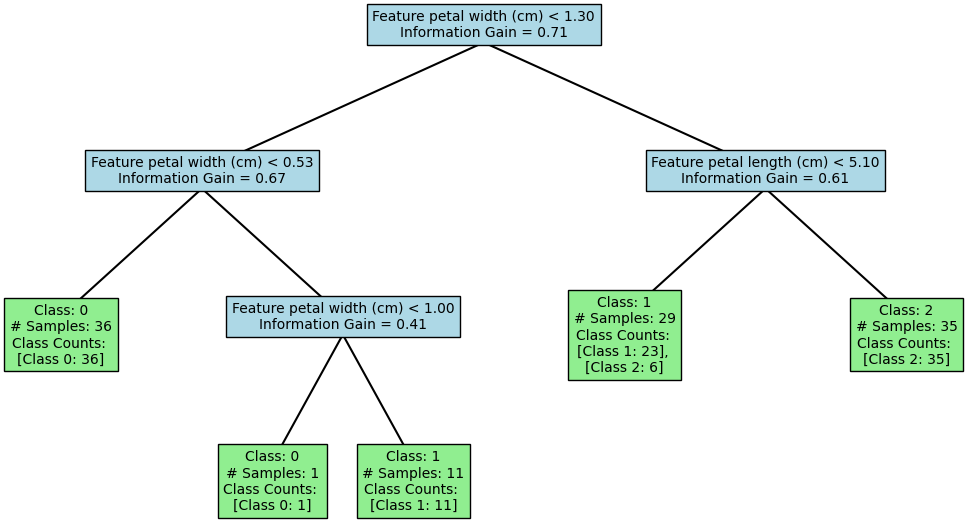

In [14]:
dt.plot_decision_tree(iris.feature_names, fig_size=(12,6))

In [15]:
dt.print_tree()

                                → 🍃 LEAF | Label Counts = 0.0->36 | Pred Probs = [1. 0. 0.]
                → ❓ NODE | IG = 0.6731015728685515 | Split IF X[3] < 0.525 then LEFT else RIGHT
                                                → 🍃 LEAF | Label Counts = 0.0->1 | Pred Probs = [1. 0. 0.]
                                → ❓ NODE | IG = 0.41381685030363374 | Split IF X[3] < 1.0 then LEFT else RIGHT
                                                → 🍃 LEAF | Label Counts = 1.0->11 | Pred Probs = [0. 1. 0.]
→ ❓ NODE | IG = 0.7095311377468411 | Split IF X[3] < 1.3 then LEFT else RIGHT
                                → 🍃 LEAF | Label Counts = 1.0->23, 2.0->6 | Pred Probs = [0.         0.79310345 0.20689655]
                → ❓ NODE | IG = 0.6088858430669675 | Split IF X[2] < 5.1 then LEFT else RIGHT
                                → 🍃 LEAF | Label Counts = 2.0->35 | Pred Probs = [0. 0. 1.]


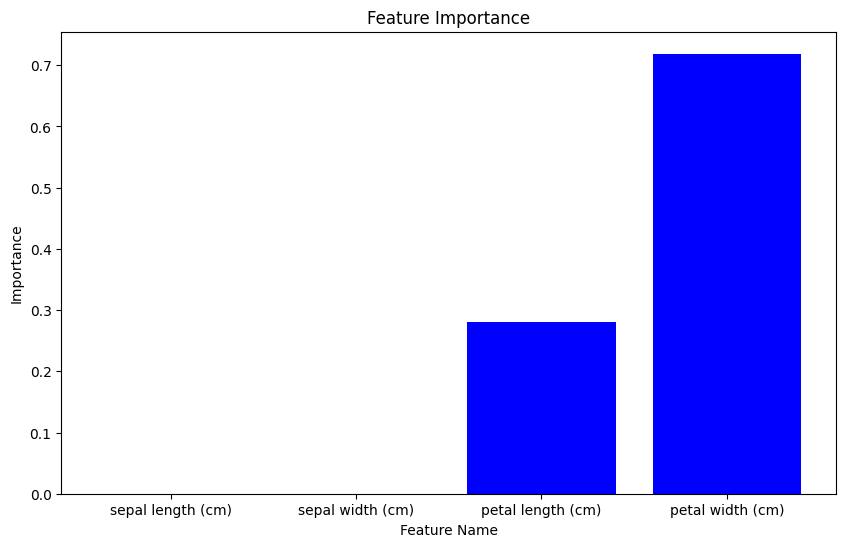

In [16]:
dt.plot_feature_importance(iris.feature_names)

In [17]:
train_preds = dt.predict(X_set=X_train)

print("""
----------------------
   Train Performance
----------------------
""")

true_preds = train_preds == Y_train
accuracy = np.sum(true_preds) / len(Y_train)
print("True Predictions:", np.sum(true_preds), "/", len(Y_train))
print("Accuracy:", accuracy)

classes = np.unique(Y_train)
precision_list = []
recall_list = []
f1_list = []

for cls in classes:
    TP = np.sum((train_preds == cls) & (Y_train == cls))
    FP = np.sum((train_preds == cls) & (Y_train != cls))
    FN = np.sum((train_preds != cls) & (Y_train == cls))
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Promedios macro
precision_macro = np.mean(precision_list)
recall_macro = np.mean(recall_list)
f1_macro = np.mean(f1_list)

print("Precision (macro):", precision_macro)
print("Recall (macro):", recall_macro)
print("F1 Score (macro):", f1_macro)


----------------------
   Train Performance
----------------------

True Predictions: 106 / 112
Accuracy: 0.9464285714285714
Precision (macro): 0.9500000000000001
Recall (macro): 0.9512195121951219
F1 Score (macro): 0.9466571834992887


In [18]:
test_preds = dt.predict(X_set=X_test)

print("""
----------------------
   Test Performance
----------------------
""")

true_preds_test = test_preds == Y_test
accuracy_test = np.sum(true_preds_test) / len(Y_test)
print("True Predictions:", np.sum(true_preds_test), "/", len(Y_test))
print("Accuracy:", accuracy_test)

classes = np.unique(Y_test)
precision_list_test = []
recall_list_test = []
f1_list_test = []

for cls in classes:
    TP = np.sum((test_preds == cls) & (Y_test == cls))
    FP = np.sum((test_preds == cls) & (Y_test != cls))
    FN = np.sum((test_preds != cls) & (Y_test == cls))
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    precision_list_test.append(precision)
    recall_list_test.append(recall)
    f1_list_test.append(f1)

# Promedios macro
precision_macro_test = np.mean(precision_list_test)
recall_macro_test = np.mean(recall_list_test)
f1_macro_test = np.mean(f1_list_test)

print("Precision (macro):", precision_macro_test)
print("Recall (macro):", recall_macro_test)
print("F1 Score (macro):", f1_macro_test)


----------------------
   Test Performance
----------------------

True Predictions: 34 / 38
Accuracy: 0.8947368421052632
Precision (macro): 0.8968253968253969
Recall (macro): 0.8680555555555555
F1 Score (macro): 0.8774509803921569


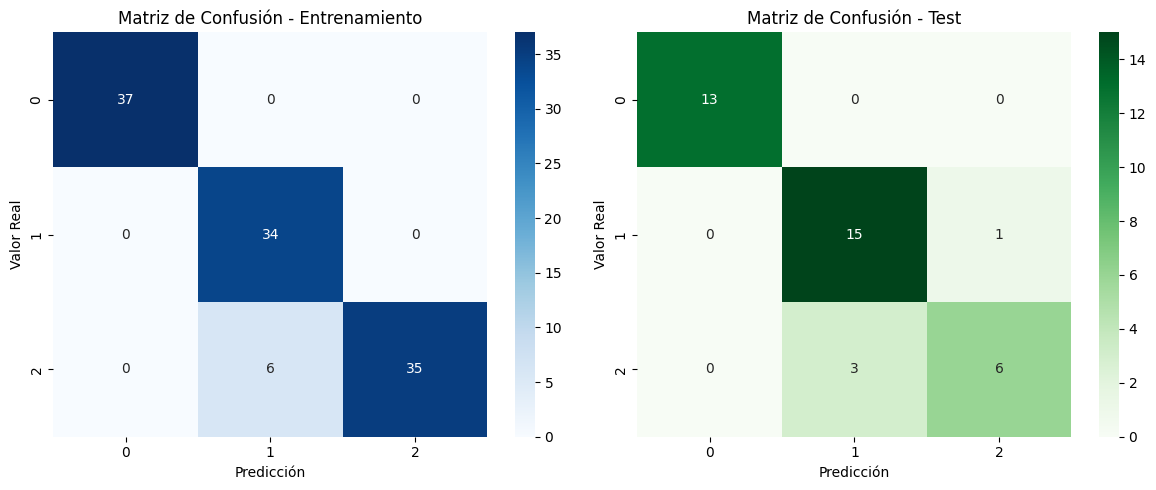

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_cm = confusion_matrix(Y_train, train_preds)
test_cm = confusion_matrix(Y_test, test_preds)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz de Confusión - Entrenamiento")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Valor Real")

sns.heatmap(test_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Matriz de Confusión - Test")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Valor Real")

plt.tight_layout()
plt.show()

## 5. Aprendizaje por Ensamble

Los modelos de ensamble permiten **reducir la varianza** inherente de los árboles de decisión individuales, lo cual se traduce en mejores resultados de precisión en muchas tareas de clasificación.

> ⚠️ Sin embargo, esta mejora en el rendimiento suele venir acompañada de una pérdida en la interpretabilidad: 
>
> Los modelos de ensamble son mucho más complejos y menos transparentes que un árbol de decisión simple.

### ❓ ¿En qué consiste el aprendizaje por ensamble?

La idea general del aprendizaje por ensamble se basa en los siguientes pasos:

1. Entrenar múltiples modelos sobre el mismo dataset.
2. Permitir que cada modelo individual realice sus propias predicciones.
3. Construir un meta-modelo que combine o agregue las predicciones individuales.
4. Utilizar este meta-modelo para obtener una predicción final más robusta que cualquiera de las predicciones individuales.

> Si un modelo individual falla en un escenario particular, los demás modelos pueden compensar su error.
>
> 👍 Gracias a esto, la predicción agregada se vuelve más estable y precisa.

<p align="center">
  <img  src="img/ensamble_01.png" alt="bootstrap sampling">
</p>


En un ensamble es posible utilizar modelos distintos entre sí, aunque en muchos casos se opta por usar varios árboles de decisión con configuraciones diversas.

#### 🔍 Nos enfocaremos en tres enfoques clásicos de ensamble basados en árboles:

1. **Bagging**
2. **Random Forest**
3. Boosting


### **1. Bagging (Bootstrap Aggregating)**

El término **Bagging** proviene de la técnica **Bootstrap Aggregation**. Para entender cómo funciona, primero veamos qué es **Bootstrap**:



#### ¿Qué es el método **Bootstrap**?

El **Bootstrap** consiste en generar, a partir de un dataset original, múltiples nuevos datasets mediante <span style="color:blue">**muestreo con reemplazo**</span>.  
Cada uno de estos nuevos conjuntos tiene la **misma cantidad de observaciones** que el original, pero puede contener **observaciones repetidas**.

<p align="center">
  <img src="img/bootstrap_01.png" alt="bootstrap sampling">
</p>


#### ¿Qué hace **Bagging**?

Bagging entrena **N árboles de decisión distintos**, cada uno sobre uno de estos datasets generados por Bootstrap.  
Cada modelo es, por tanto, **ligeramente diferente** en sus decisiones, y se combinan para formar un **meta-modelo más robusto**.

<p align="center">
  <img src="img/bagging_02.png" alt="bagging ensemble">
</p>

#### ¿Y por qué **Aggregation**?

La segunda parte del nombre, "aggregation", hace referencia a que **las predicciones de todos los modelos** entrenados **se agregan para producir la salida final** del sistema:

- **Clasificación**: se aplica **votación por mayoría**.
- **Regresión**: se calcula el **promedio** de las predicciones de cada modelo.

### ¿Por qué funciona Bagging?

Al no aplicar **poda** a los árboles individuales, se permite que cada uno tenga **bajo sesgo pero alta varianza**.  
Luego, al combinarlos, el ensamble reduce esa varianza.

Si la varianza de un árbol individual es $S^2$, entonces la varianza esperada del modelo de Bagging es aproximadamente:  $\frac{S^2}{N}^*$

$^*$ _En la práctica la varianza es algo mayor ya que en Bagging los modelos no son completamente independientes, al estar entrenados sobre datos derivados del mismo conjunto original._

### 🌲🌲🌲 **Random Forest**

Random Forest parte de la misma idea que Bagging, pero agrega una mejora clave para **descorrelacionar los árboles**.

### 🔍 ¿Por qué es necesaria una mejora?

- En Bagging, los árboles se entrenan con diferentes muestras de datos, pero **usan todas las variables independientes (features) disponibles**.
- Esto genera árboles **altamente correlacionados**, especialmente si algunas variables dominan la predicción.

### ¿Qué hace Random Forest?

Random Forest agrega un paso más:  
**durante cada división interna del árbol, se selecciona un subconjunto aleatorio de <span style="color:blue">features (sin reemplazo)</span>**.

Esto implica que:
- Cada árbol ve un subconjunto diferente de datos **y** de features.
- Se reduce significativamente la correlación entre árboles → **mejora la generalización**.

<p align="center">
  <img src="img/random_forest_01.png" alt="random forest esquema">
</p>

### ⚙️ ¿Cuántas features $M$ seleccionar?

Dado $P$ features totales, se elige un número $M < P$ de predictores para evaluar en cada división:

- Para **regresión**:  
  $$M = \frac{P}{3}$$

- Para **clasificación**:  
  $$ M = \sqrt{P} \quad \text{o} \quad M = \log_2(P)$$

> Si los predictores están muy correlacionados, se puede usar un valor **menor** de $M$.


### 🎯 Predicción final del ensamble:
La predicción se hace exactamente como en Bagging:

- **Clasificación**: se aplica **votación por mayoría**.
- **Regresión**: se calcula el **promedio** de las predicciones.

🧠 Entonces...

- Bagging = Bootstrap sobre las observaciones y usa todas las features en cada split.

- Random Forest = Bootstrap + selección aleatoria de features en cada split.

## 6. Implementación de Random Forest

¿Qué hiperparámetros podríamos implementar?
- Número de árboles de decisión (`n_estimators`)
- Número de features a considerar cuando se hace un split en cada nodo de cada árbol (`max_features`)
- Tamaño del conjunto de datos bootstrap (`bootstrap_max_samples`)
- Hiperparámetros del árbol de decisión (`min_samples_leaf`, `min_information_gain`, `max_depth`, `criterion`)

¿Que funciones deberíamos implementar?
- Función para crear las muestras bootstrap para cada modelo base del RF
- Función de `train` que basicamente cree una lista que contenga todos los modelos base entrenados.
- Función de `predict` que considere a todos los modelos base para retornar la probabilidad predicha del modelo de RF.